In [142]:
import pandas as pd
import matplotlib.pyplot as plt


One of the most important things to do while reading data is to make sure that we parse the data into a 
datetime index format. When we read a csv file we have an integer column as the first column and the timecolumn is considered as
a string datatype. 

So we write a small parsing condition to strip the timestamp column in time format with datetimeindex.

In [143]:
dateparse = lambda dates: pd.datetime.strptime(dates,'%Y-%m-%d %H:%M:%S')
data = pd.read_csv("../Prashant July/Prashant_modified_new_data_cil.csv",sep = ',',index_col='timestamp',date_parser=dateparse)
data = data[['2','cpu','mem']]
# There are more than one duplicate rows in our data. Need to eliminate that while comparing the values across all columns.
data = data.drop_duplicates()


In [144]:
%matplotlib inline
resampled_data=data.resample('5Min').mean()



In [145]:
# consider only cpu data as of now for all CIL instances. Data has already been resampled above for 20 seconds
# just drop the mem column from our data to train the model using just cpu as data.

%matplotlib inline
#data.rename(columns={'2':'hostname'}, inplace=True)
cpu_data = resampled_data.drop(['mem'],axis=1)


In [147]:
#Exporting dataframe as csv for R
cpu_data.to_csv('formatted_cpu_data_for_R_forecasting_5min.csv')

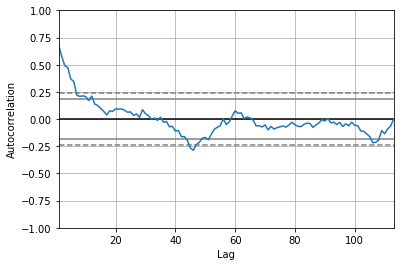

In [146]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(cpu_data)









import numpy as np
grouped = data.groupby('hostname')

ncols=33
nrows = int(np.ceil(grouped.ngroups/ncols))

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(22,14), sharex=True)

for (key, ax) in zip(grouped.groups.keys(), axes.flatten()):
    grouped.get_group(key).plot(ax=ax)

ax.legend()
plt.show()

rolling = series.rolling(window=1)
rolling_mean = rolling.mean()
print(rolling_mean.head(10))

series.plot()
rolling_mean.plot(color= 'red')
plt.show()

rolling_mean.to_csv('rollingcpu.csv')